## Optimization: Assignment 1

### Non-linear least squares problems and the Levenberg-Marquardt algorithm

#### Introduction to the algorithm

**[Add description / theory here]**

In this demo we will test the LM code on two nonlinear least squares problems: the one given in the assigment and a cubic function with three parameters.

Let's start by importing the necessary packages and the class containing the optimization algorithm.

In [1]:
# Standard package imports

import numpy as np
import matplotlib.pyplot as plt
#import jupyter_black

#jupyter_black.load()

In [10]:
# Change working directory to core to enable codebase imports

import os

#os.chdir("..\\optimization-repo")

#os.chdir("..\\opt")

%load_ext autoreload
%autoreload 2

# Import Levenberg-Marquardt class from codebase

from levenberg_marquardt import LevenbergMarquardt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
os.getcwd()

'/Users/mattias/Projekt/Optimization/Optimisation-assignments'

### Test case 1: Exponential function given in the assignment

The model is given by 

$$
    y(t) = x_1 e^{x_2 t}
$$

We will test this on the datapoints in the assignment. Start by creating arrays with inputs and defining the function and gradient to be used.

In [12]:
# TEST CASE 1 (given in the assignment)

# Define values of t, y_t and x0
t = np.arange(0.5, 4.5, 0.5)
y_t = np.array([7.2, 3.0, 1.5, 0.85, 0.48, 0.25, 0.20, 0.15])

# Define test function
def test_function_1(x_k):

    fx = y_t - (x_k[0] * np.exp(x_k[1] * t))
    return fx


# Define gradient function
def test_gradient_1(x_k):

    grad_fx = np.array([-np.exp(x_k[1] * t), -t * x_k[0] * np.exp(x_k[1] * t)])
    return grad_fx

#### Run the algorithm with gradient function supplied

------ Output report ------

Successful convergence: True
Parameter values: [15.63598613 -1.572849  ]
Function value: 0.021618858459602104
Number of iterations: 62
Final gradient vector: [-6.43486343e-06  2.02732592e-06]


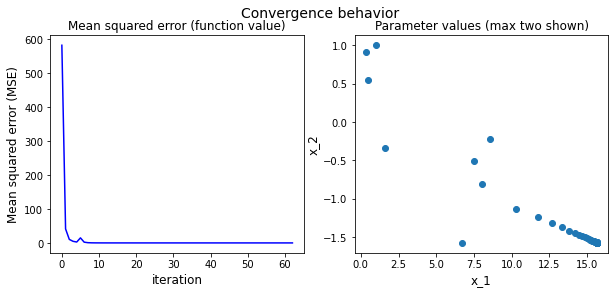

------ Output report ------

Successful convergence: True
Parameter values: [15.63597834 -1.57284833]
Function value: 0.021618858475577325
Number of iterations: 68
Final gradient vector: [-6.80934716e-06  2.14526482e-06]


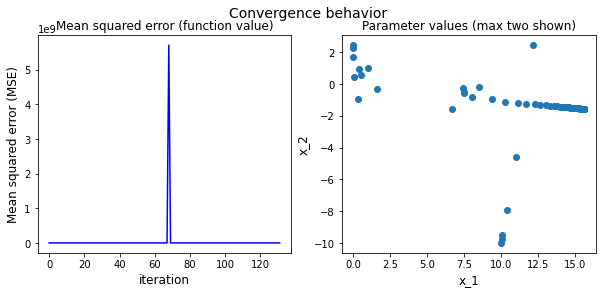

------ Output report ------

Successful convergence: True
Parameter values: [15.6359657  -1.57284725]
Function value: 0.021618858503409888
Number of iterations: 187
Final gradient vector: [-7.41693477e-06  2.33668559e-06]


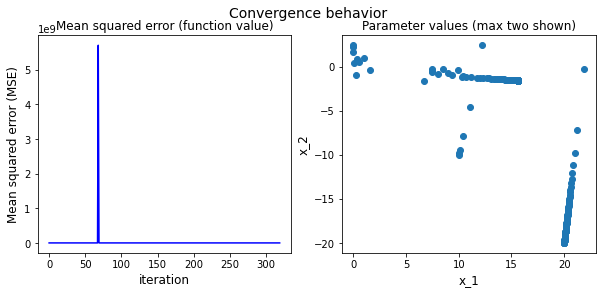

In [13]:
# Initialize optimizer WITH gradient argument
optimizer_1 = LevenbergMarquardt(
    func=test_function_1,
    #grad=test_gradient_1,
    tol=1e-5,
    lambda_=1,
    alpha=1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1., 1])

# Run optimizer
x_k, mse, y_diff = optimizer_1.minimize(x0)


x_k_list = [np.array([10., -10]), np.array([20., -20])]

for x0 in x_k_list:
    x_k, mse, y_diff = optimizer_1.minimize(x0)

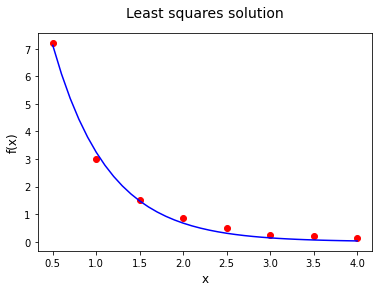

In [14]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [x_k[0] * np.exp(x_k[1] * line_range[i]) for i in range(len(line_range))]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

#### Run the algorithm using numerically approximated gradient

### Test case 2: Quadratic function

The model is now given by 

$$
    y(t) = x_1t + x_2t^2 - x_3t^3
$$

Datapoints (i.e. the "true" $y$-values) are simulated using the parameters $x = \{x_1 = 1, x_2 = 1.5, x_3 = -2\}$ and addition of a noise term $\epsilon \sim \mathcal{N}(0, 1)$.

In [15]:
# Define values of t, y_t and x0
x_true = [1, 1.5, -2]
y_calc = (
    lambda t: x_true[0] * t + x_true[1] * np.power(t, 2) - x_true[2] * np.power(t, 3)
)
t = np.array(np.arange(0, 3, 0.1))
y_t = np.array([y_calc(t_val) for t_val in t]) + np.random.normal(
    loc=0, scale=1, size=(1, len(t))
)

# Define test function
def test_function_2(x_k):

    fx = y_t - (x_k[0] * t + x_k[1] * np.power(t, 2) - x_k[2] * np.power(t, 3))
    return fx


# Define gradient function
def test_gradient_2(x_k):

    grad_fx = np.array([-t, -2 * t, 3 * t])
    return grad_fx

------ Output report ------

Successful convergence: True
Parameter values: [ 1.21305183  1.95679493 -1.77614175]
Function value: 1.448481287274786
Number of iterations: 157
Final gradient vector: [-9.39131748e-05 -2.30548692e-04  5.79373588e-04]


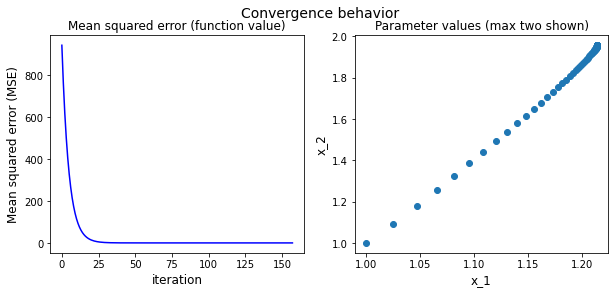

In [16]:
# Initialize optimizer WITH gradient argument
optimizer_2 = LevenbergMarquardt(
    func=test_function_2,
    #grad=test_gradient_2,
    tol=1e-3,
    lambda_=1,
    alpha=0.1,
    max_iter=1000,
    plot_conv=True,
)

# Set initial parameter values
x0 = np.array([1, 1, 1])

# Run optimizer
x_k, mse, y_diff = optimizer_2.minimize(x0)

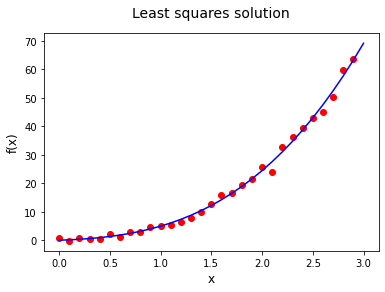

In [17]:
# Plot the results

# Create plot
plt.figure(figsize=(6, 4))
plt.title("Least squares solution", fontsize=14, pad=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

# Calculate least squares solution (line)
line_range = np.arange(min(t), max(t) + 0.1, 0.1)
line_values = [
    x_k[0] * i + x_k[1] * np.power(i, 2) - x_k[2] * np.power(i, 3) for i in line_range
]

# Plot solution and original datapoints
plt.scatter(t, y_t, color="red")
plt.plot(line_range, line_values, color="blue")
plt.show()

### Experimenting with different values of lambda and step sizes

@Mattias